In [120]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib notebook

# Strategy 1 - Unconnected Imprint with IP

Vector of neurons with membrane potentials $\vec{U}(t)$ and thresholds $\vec{T}(t)$ receive static input $\vec{U}_I(t)$. The discrete-time system evolves according to the following equations

$\vec{U}(t + \Delta t) = \Theta \bigl(\vec{U}(t) + \vec{U}_I(t) - \vec{T}(t) \bigr)$

$\vec{T}(t + \Delta t) = \vec{T}(t) + \alpha(V(t) - U_0)$

Plan
* Input picture, adapt thresholds
* Input noise, fix thresholds, receive picture

<IPython.core.display.Javascript object>


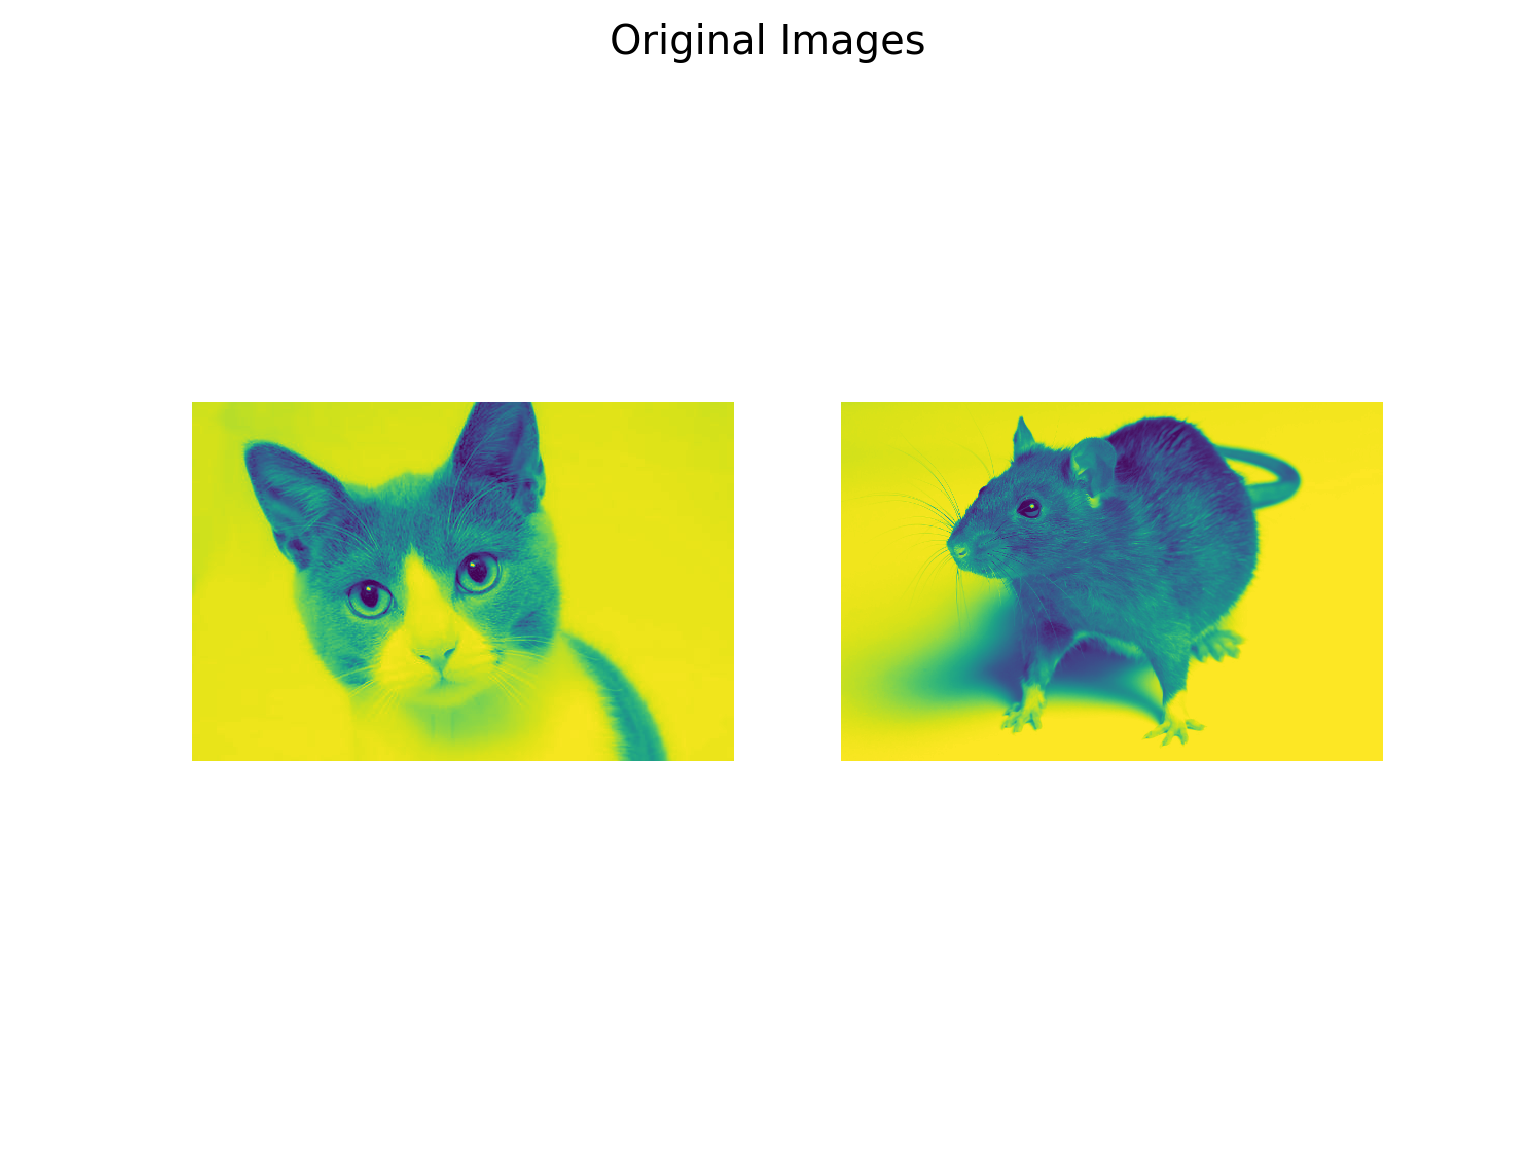

Text(0.5,0.98,'Original Images')

In [121]:
# Load raw images
catImg   = mpimg.imread('img/cat2.png')
mouseImg = mpimg.imread('img/rat2.png')[:,:,0]
dim = catImg.shape

# Plot raw images
fig, axis = plt.subplots(ncols=2)
axis[0].imshow(catImg)
axis[1].imshow(mouseImg)
axis[0].set_axis_off()
axis[1].set_axis_off()
plt.suptitle('Original Images')

<IPython.core.display.Javascript object>


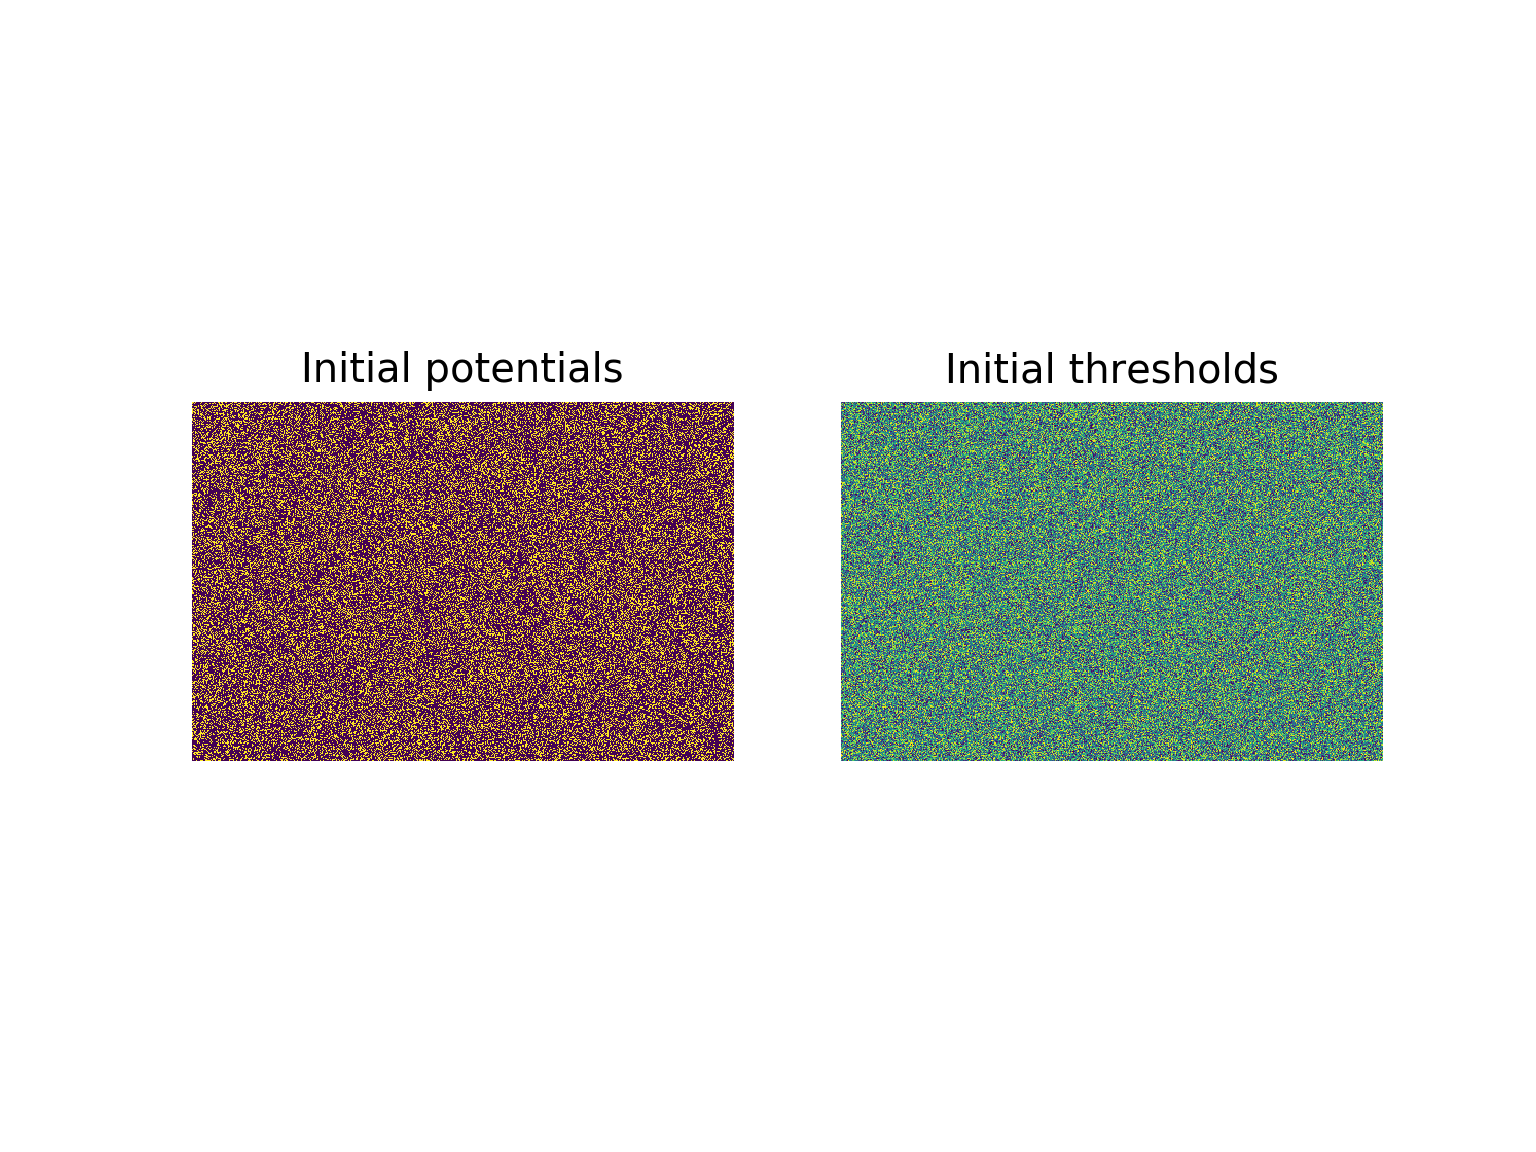

Text(0.5,1,'Initial thresholds')

In [122]:
# Initialize random receptor neurons and thresholds
alpha = 0.01
U = (np.random.rand(dim[0], dim[1]) < 0.3).astype(int)
T = np.random.rand(dim[0], dim[1])
U0 = 0.5 * np.ones(dim)

# Plot initial neural state
fig, axis = plt.subplots(ncols=2)
axis[0].imshow(U)
axis[1].imshow(T)
axis[0].set_axis_off()
axis[1].set_axis_off()
axis[0].set_title('Initial potentials')
axis[1].set_title('Initial thresholds')

<IPython.core.display.Javascript object>


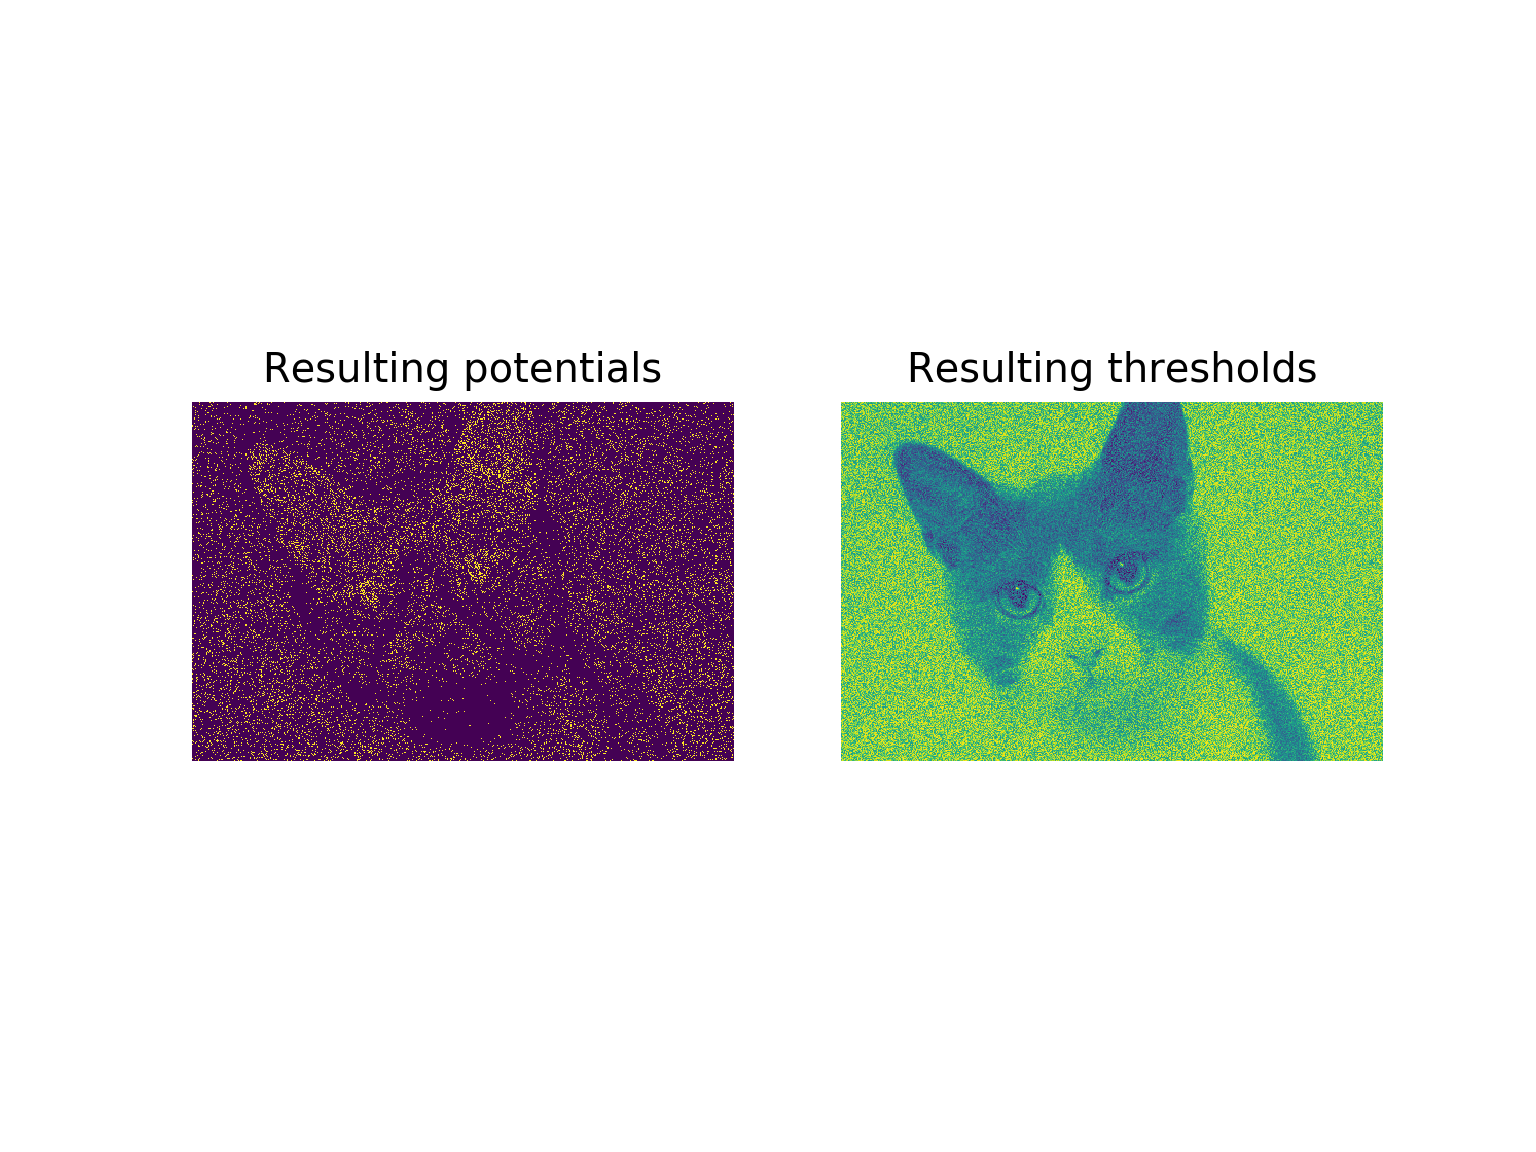

Text(0.5,1,'Resulting thresholds')

In [123]:
# Expose cat
N_Expose = 2000
for i in range(N_Expose):
    UNew = (U + catImg > T).astype(int)
    T = T + alpha*(U - U0)
    U = UNew
    
# Plot resulting neural state
fig, axis = plt.subplots(ncols=2)
axis[0].imshow(U)
axis[1].imshow(T)
axis[0].set_axis_off()
axis[1].set_axis_off()
axis[0].set_title('Resulting potentials')
axis[1].set_title('Resulting thresholds')

<IPython.core.display.Javascript object>


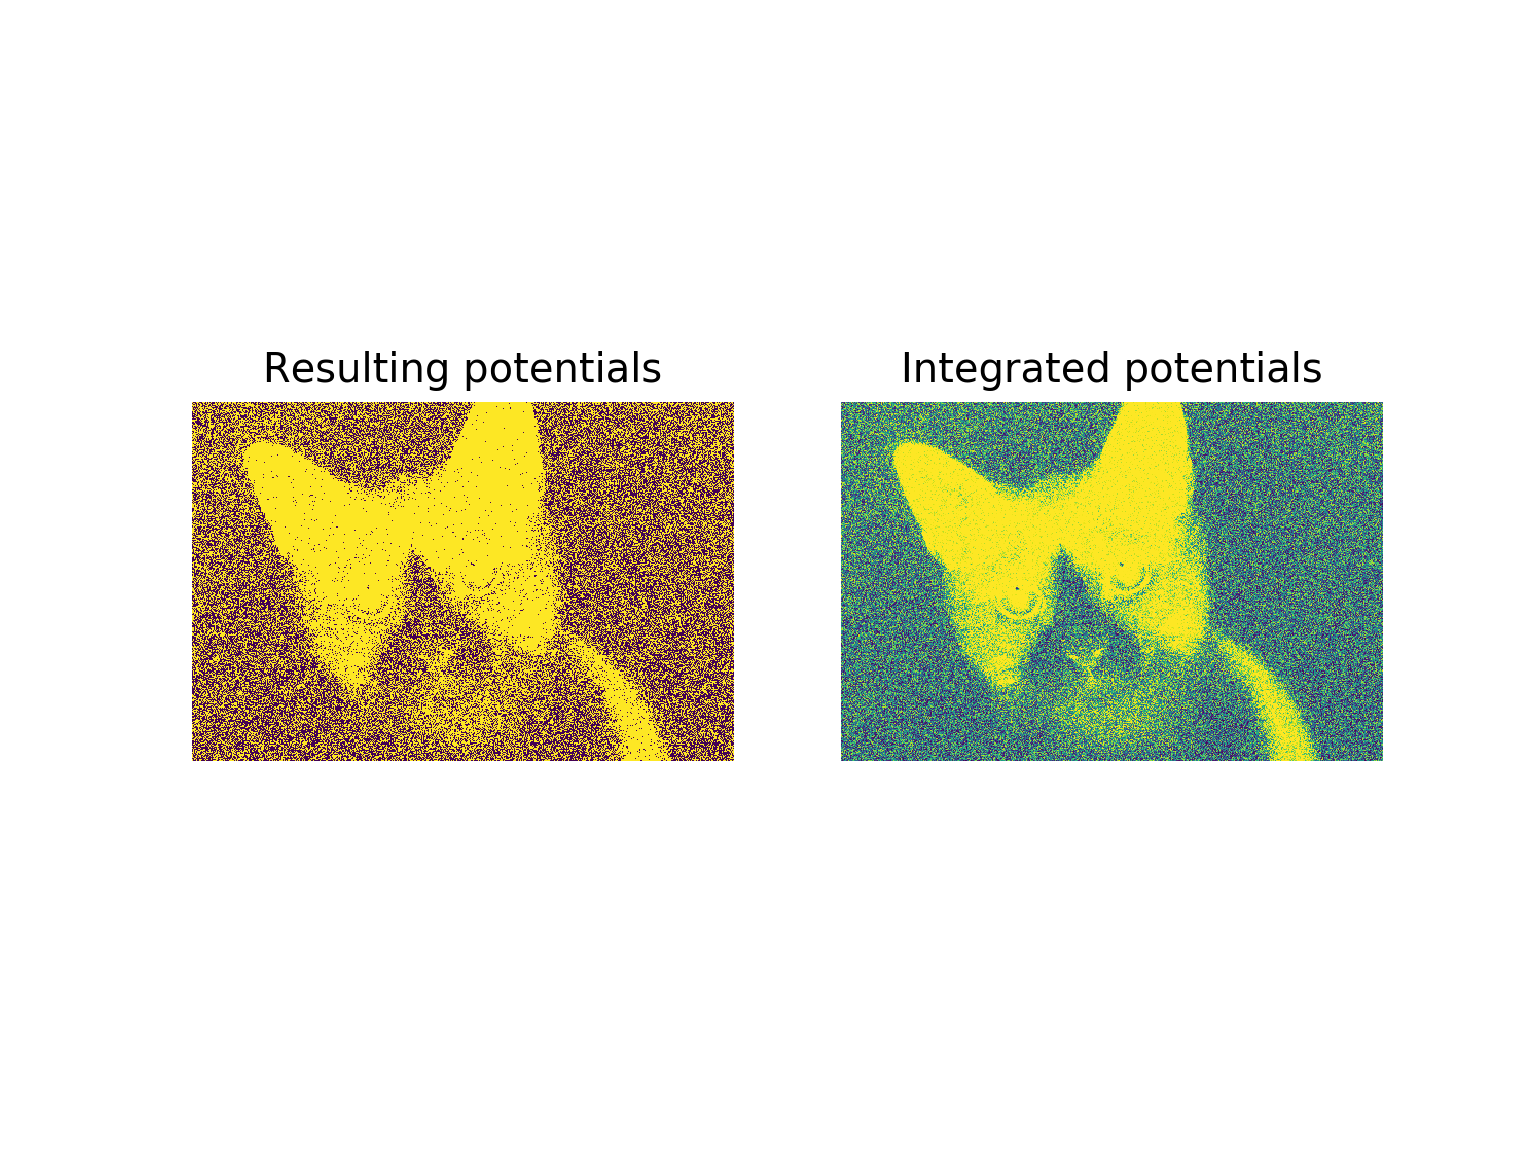

Text(0.5,1,'Integrated potentials')

In [124]:
# Input noise into system, integrate state
N_Sample = 1000
Out = np.zeros(dim)
for i in range(N_Sample):
    noise = 2 * np.random.rand(dim[0], dim[1])
    U = (U + noise > T).astype(int)
    Out += U
    
Out /= N_Sample

# Plot integrated neural state
fig, axis = plt.subplots(ncols=2)
axis[0].imshow(U)
axis[1].imshow(Out)
axis[0].set_axis_off()
axis[1].set_axis_off()
axis[0].set_title('Resulting potentials')
axis[1].set_title('Integrated potentials')

<IPython.core.display.Javascript object>


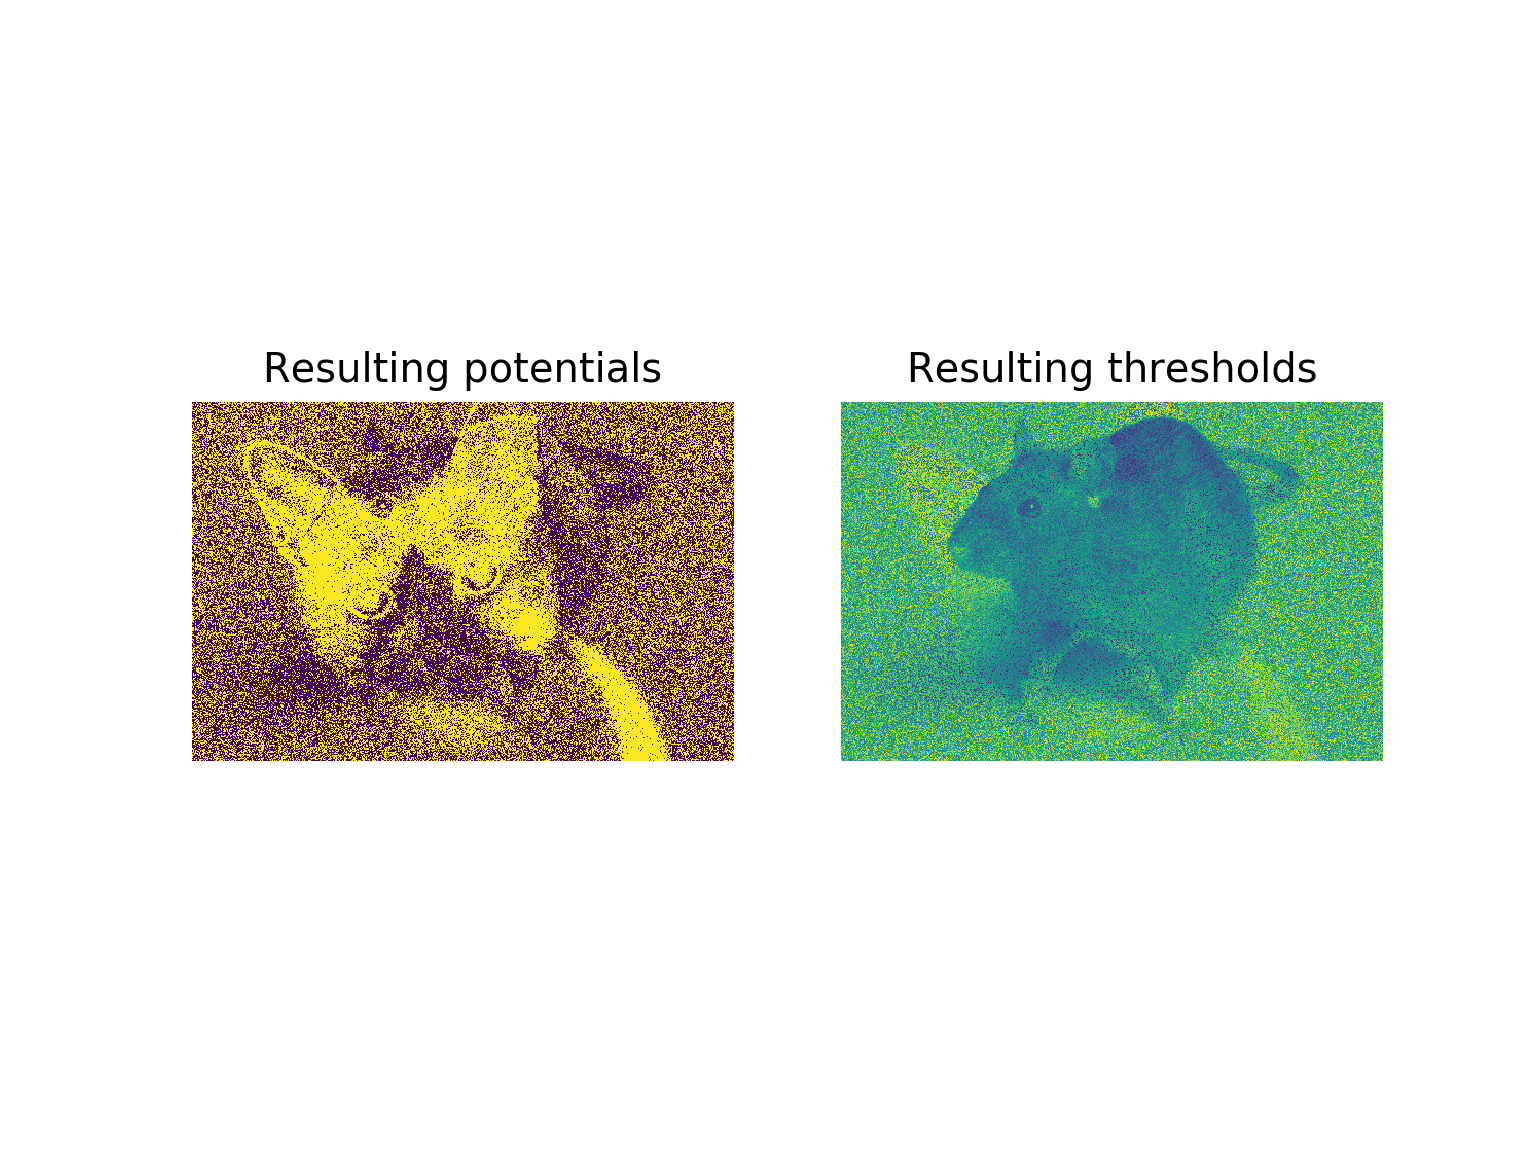

Text(0.5,1,'Resulting thresholds')

In [127]:
# Expose mouse
for i in range(10*N_Expose):
    UNew = (U + mouseImg > T).astype(int)
    T = T + alpha*(U - U0)
    U = UNew
    
# Plot resulting neural state
fig, axis = plt.subplots(ncols=2)
axis[0].imshow(U)
axis[1].imshow(T)
axis[0].set_axis_off()
axis[1].set_axis_off()
axis[0].set_title('Resulting potentials')
axis[1].set_title('Resulting thresholds')

<IPython.core.display.Javascript object>


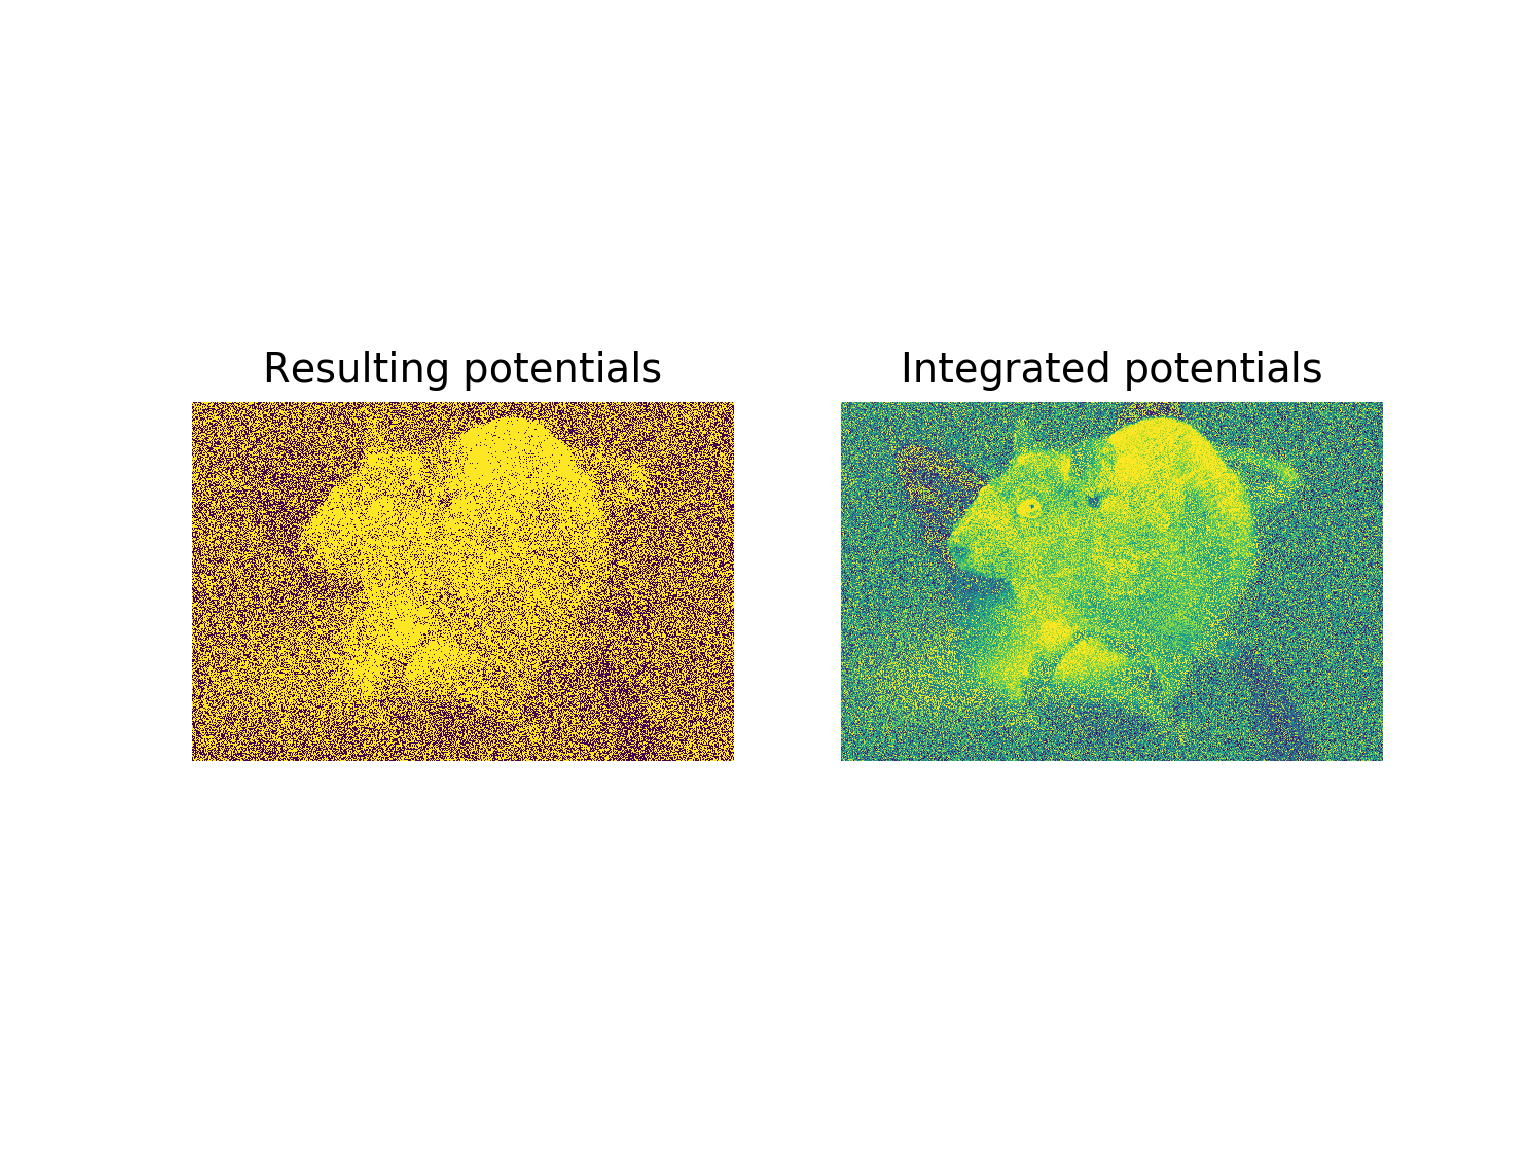

Text(0.5,1,'Integrated potentials')

In [128]:
# Input noise into system, integrate state
Out = np.zeros(dim)
for i in range(N_Sample):
    noise = 2 * np.random.rand(dim[0], dim[1])
    U = (U + noise > T).astype(int)
    Out += U
    
Out /= N_Sample

# Plot integrated neural state
fig, axis = plt.subplots(ncols=2)
axis[0].imshow(U)
axis[1].imshow(Out)
axis[0].set_axis_off()
axis[1].set_axis_off()
axis[0].set_title('Resulting potentials')
axis[1].set_title('Integrated potentials')